In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

C:\Users\Vyshnavi\anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
df = pd.read_csv("churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [11]:
#Distribution
df['Exited'].value_counts(normalize=True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

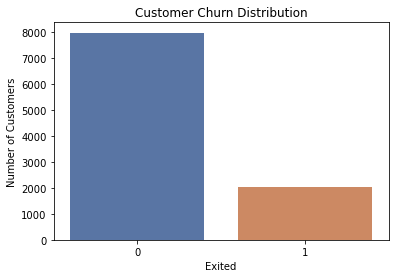

In [12]:
#Customer Churn Distribution Plot
palette='deep'
sns.set_palette(palette)
    
sns.countplot(data=df, x='Exited')

plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')

plt.show()

In [13]:
#Distribution
df['Geography'].value_counts(normalize=True)*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [14]:
#Distribution of Customer Churn in different Geographies
df.groupby('Geography')['Exited'].value_counts(normalize=True).mul(100)

Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64

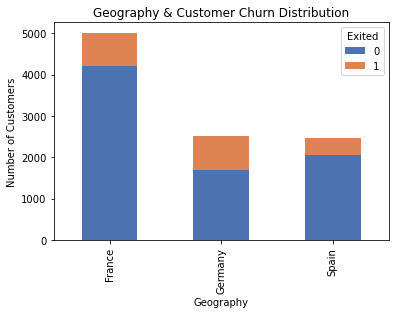

In [15]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Geography & Customer Churn Distribution')

plt.show()

In [16]:
#Distribution
df['Gender'].value_counts(normalize=True)*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [17]:
#Distribution of Customer Churn between genders
df.groupby('Gender')['Exited'].value_counts(normalize=True).mul(100)

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64

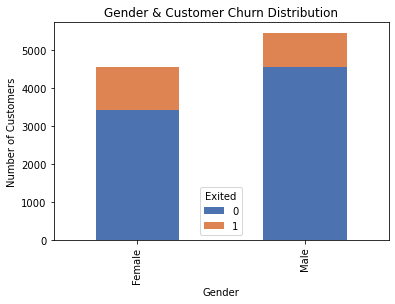

In [18]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender & Customer Churn Distribution')

plt.show()

In [19]:
#Distribution of Tenure
print(df['Tenure'].describe())
print("\n---------------------\n")
print(df['Tenure'].value_counts(normalize=True).mul(100).sort_index())

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

---------------------

0      4.13
1     10.35
2     10.48
3     10.09
4      9.89
5     10.12
6      9.67
7     10.28
8     10.25
9      9.84
10     4.90
Name: Tenure, dtype: float64


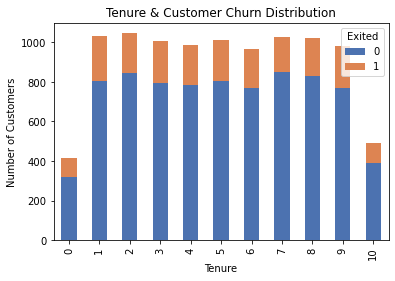

In [20]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['Tenure'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure & Customer Churn Distribution')

plt.show()

In [21]:
#Distribution of NumOfProducts
print(df['NumOfProducts'].describe())
print("\n---------------------\n")
print(df['NumOfProducts'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

---------------------

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

---------------------

NumOfProducts  Exited
1              0          72.29
               1          27.71
2              0          92.42
               1           7.58
3              1          82.71
               0          17.29
4              1         100.00
Name: Exited, dtype: float64


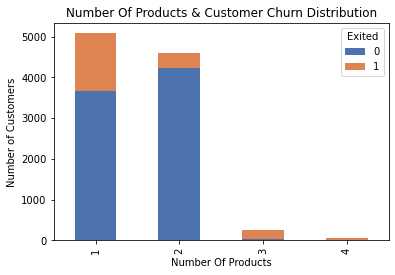

In [22]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['NumOfProducts'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Number Of Products')
plt.ylabel('Number of Customers')
plt.title('Number Of Products & Customer Churn Distribution')

plt.show()

In [23]:
#Distribution of HasCrCard
print(df['HasCrCard'].describe())
print("\n---------------------\n")
print(df['HasCrCard'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('HasCrCard')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64

---------------------

0    2945
1    7055
Name: HasCrCard, dtype: int64

---------------------

HasCrCard  Exited
0          0         79.19
           1         20.81
1          0         79.82
           1         20.18
Name: Exited, dtype: float64


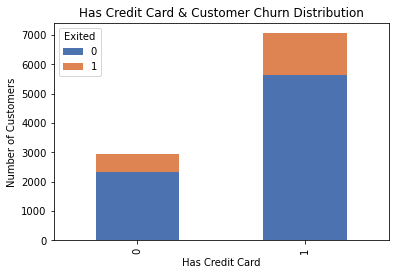

In [24]:
#Plot
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['HasCrCard'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Has Credit Card')
plt.ylabel('Number of Customers')
plt.title('Has Credit Card & Customer Churn Distribution')

plt.show()

In [25]:
#Distribution of IsActiveMember
print(df['IsActiveMember'].describe())
print("\n---------------------\n")
print(df['IsActiveMember'].value_counts().sort_index())
print("\n---------------------\n")
print(round(df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64

---------------------

0    4849
1    5151
Name: IsActiveMember, dtype: int64

---------------------

IsActiveMember  Exited
0               0         73.15
                1         26.85
1               0         85.73
                1         14.27
Name: Exited, dtype: float64


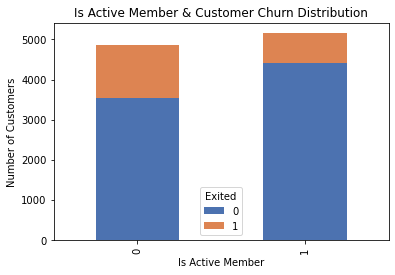

In [26]:
palette = "deep" 
sns.set_palette(palette)

pd.crosstab(df['IsActiveMember'], df['Exited']).plot(kind='bar', stacked=True)
    
plt.xlabel('Is Active Member')
plt.ylabel('Number of Customers')
plt.title('Is Active Member & Customer Churn Distribution')

plt.show()

In [27]:
#Distribution of Credit Score
print(df['CreditScore'].describe())
print("\n---------------------\n")
print(df['CreditScore'].value_counts())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

---------------------

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64


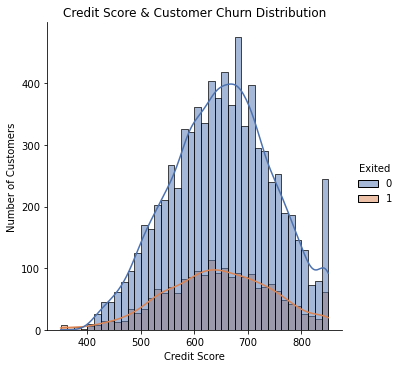

In [28]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='CreditScore',hue='Exited', kde=True, bins=40)
    
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Credit Score & Customer Churn Distribution')

plt.show()

In [29]:
#Distribution of Age
print(df['Age'].describe())
print("\n---------------------\n")
print(df['Age'].value_counts())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

---------------------

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


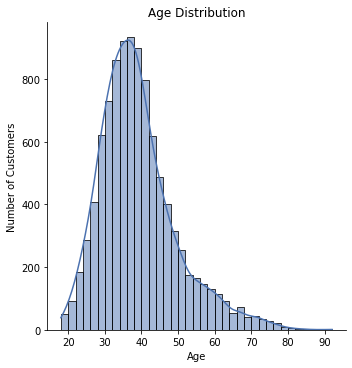

In [30]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Age', kde=True, bins=37)
    
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution')

plt.show()

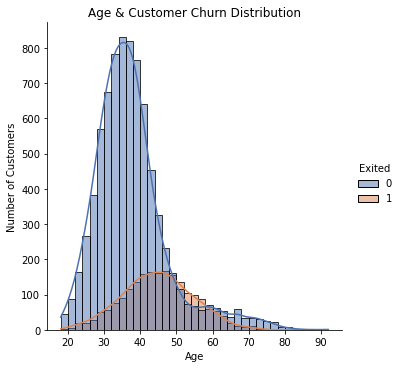

In [31]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Age', hue='Exited',kde=True, bins=37)
    
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age & Customer Churn Distribution')

plt.show()

In [32]:
#Distribution of Balance
print(df['Balance'].describe())
print("\n---------------------\n")
print(df['Balance'].value_counts().sort_index())

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

---------------------

0.00         3617
3768.69         1
12459.19        1
14262.80        1
16893.59        1
             ... 
216109.88       1
221532.80       1
222267.63       1
238387.56       1
250898.09       1
Name: Balance, Length: 6382, dtype: int64


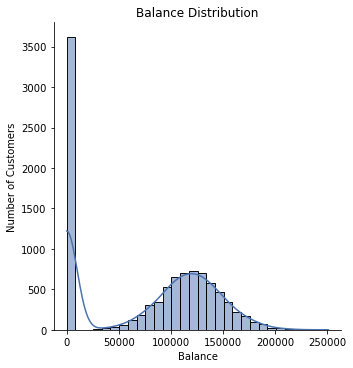

In [33]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Balance', kde=True, bins=30)
    
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance Distribution')

plt.show()

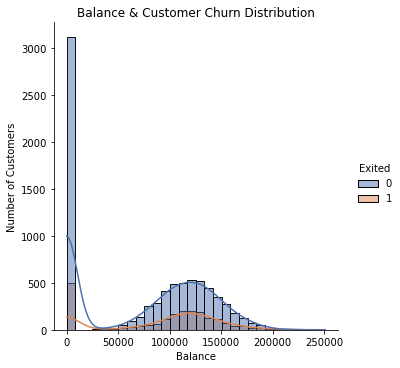

In [34]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='Balance', hue='Exited',kde=True, bins=30)
    
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance & Customer Churn Distribution')

plt.show()

In [35]:
#Distribution of EstimatedSalary
print(df['EstimatedSalary'].describe())
print("\n---------------------\n")
print(df['EstimatedSalary'].value_counts().sort_index())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

---------------------

11.58        1
90.07        1
91.75        1
96.27        1
106.67       1
            ..
199909.32    1
199929.17    1
199953.33    1
199970.74    1
199992.48    1
Name: EstimatedSalary, Length: 9999, dtype: int64


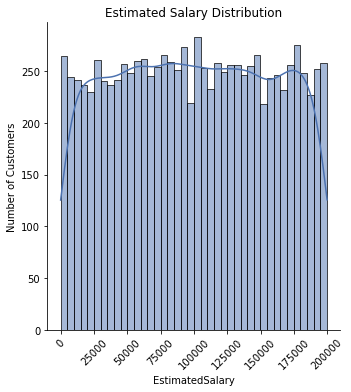

In [36]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='EstimatedSalary', kde=True, bins=40)
    
plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary Distribution')
plt.xticks(rotation=45)

plt.show()

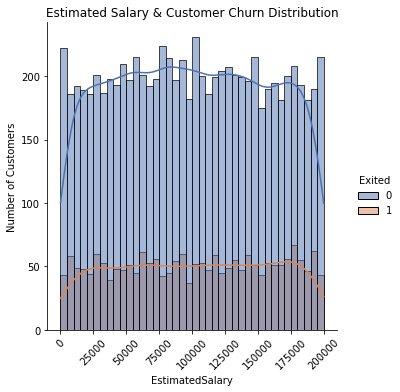

In [37]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=df, x='EstimatedSalary',hue='Exited', kde=True, bins=40)
    
plt.xlabel('EstimatedSalary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary & Customer Churn Distribution')
plt.xticks(rotation=45)

plt.show()

In [38]:
print("Size of Dataset before dropping columns : ",df.shape)
drop_columns = ['RowNumber','CustomerId','Surname']
df.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df.shape)

Size of Dataset before dropping columns :  (10000, 14)
Size of Dataset after dropping columns :  (10000, 11)


In [39]:
categorical_columns = ['Geography','Gender']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

#Drop original categorical columns
df_encoded.drop(categorical_columns,axis=1,inplace=True)

In [40]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [41]:
continuous_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])

df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


In [42]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

In [43]:
#Train Test Split
X = df_encoded.drop('Exited',axis=1)
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [44]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.8139
Average Precision: 0.7269
Average Recall: 0.5928
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.7907
Average Precision: 0.6841
Average Recall: 0.6895
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8606
Average Precision: 0.8202
Average Recall: 0.7113
-----------------------
Classifier: KNN
Average Accuracy: 0.8120
Average Precision: 0.7086
Average Recall: 0.6158
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.8189
Average Precision: 0.7218
Average Recall: 0.6550
-----------------------
Classifier: XGB
Average Accuracy: 0.8492
Average Precision: 0.7795
Average Recall: 0.7157
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000


---------------------------------------------



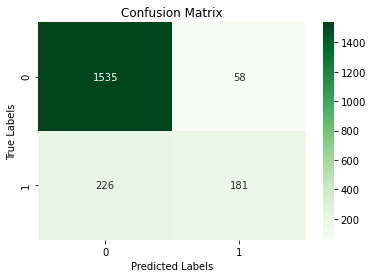

In [45]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12740, 13)
(3186, 13)
(12740,)
(3186,)


In [48]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.7135
Average Precision: 0.7136
Average Recall: 0.7135
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.8237
Average Precision: 0.8289
Average Recall: 0.8266
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8885
Average Precision: 0.8884
Average Recall: 0.8877
-----------------------
Classifier: KNN
Average Accuracy: 0.8232
Average Precision: 0.8338
Average Recall: 0.8232
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.7141
Average Precision: 0.7155
Average Recall: 0.7141
-----------------------
Classifier: XGB
Average Accuracy: 0.8940
Average Precision: 0.8950
Average Recall: 0.8940
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.92      0.88      0.90      1593

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186


---------------------------------------------



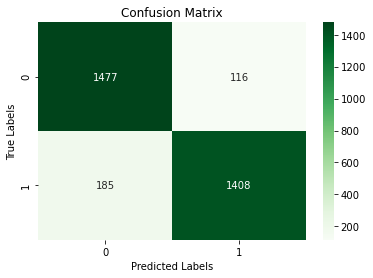

In [49]:
# Create an XGBClassifier model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#Compute Accuracy
evaluate_model(y_test,y_pred)